In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../data/'

In [3]:
reviews = pd.read_csv(path+"wine-reviews/winemag-data_first150k.csv", index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


#### Scatterplot

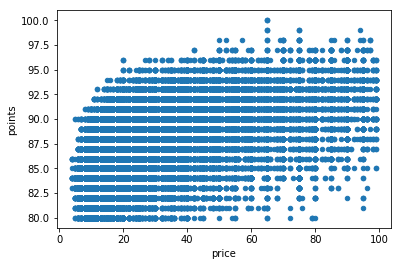

In [6]:
reviews.loc[reviews['price']<100].plot.scatter(x='price',y='points')

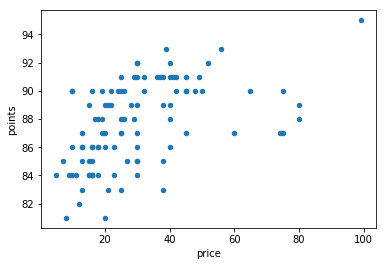

In [11]:
reviews.loc[reviews['price']<100].sample(100).plot.scatter(x='price',y='points')

#### Hexplot

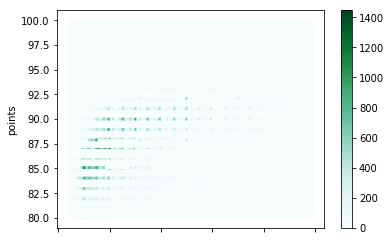

In [15]:
reviews.loc[reviews['price']<100].plot.hexbin(x='price',y='points')

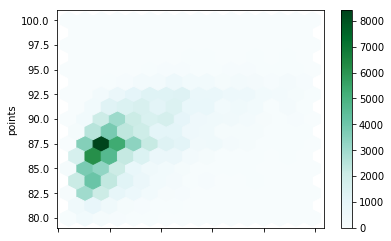

In [14]:
reviews.loc[reviews['price']<100].plot.hexbin(x='price',y='points',gridsize=15)

#### Stacked plots

In [58]:
most_reviewd_wine_varieties = reviews['variety'].value_counts().head(5)
most_reviewd_wine_varieties

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Name: variety, dtype: int64

In [64]:
top_five = reviews.loc[(reviews['variety']=='Chardonnay') |
            (reviews['variety']=='Pinot Noir') |
            (reviews['variety']=='Cabernet Sauvignon') |
            (reviews['variety']=='Red Blend') |
            (reviews['variety']=='Bordeaux-style Red Blend')]

In [74]:
wine_counts = pd.crosstab(reviews['points'],top_five['variety'])
wine_counts

variety,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5,89,70,36,75
81,23,160,154,86,108
82,83,436,523,296,233
83,122,571,686,350,366
84,334,925,1170,757,623
85,379,1058,1299,903,608
86,467,1205,1525,1260,919
87,679,1589,1887,1784,1375
88,741,1160,1513,1586,1366


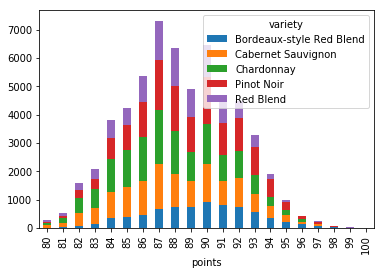

In [71]:
wine_counts.plot.bar(stacked=True)

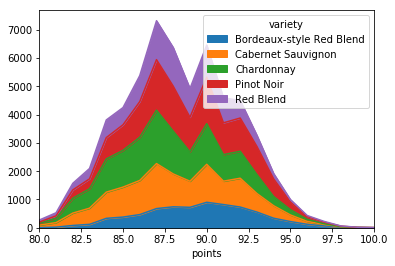

In [75]:
wine_counts.plot.area()

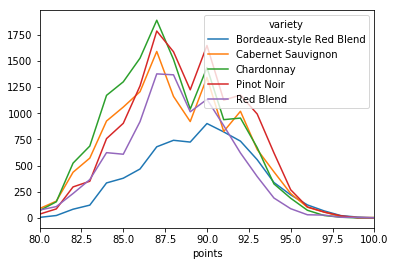

In [76]:
wine_counts.plot.line()

#### Plotting with seaborn

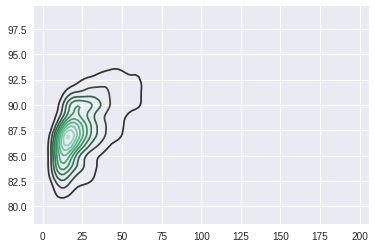

In [9]:
sns.kdeplot(reviews.loc[reviews['price']<200].loc[:,['price','points']].sample(5000))

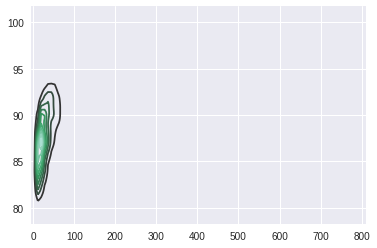

In [13]:
sns.kdeplot(reviews[['price','points']].dropna().sample(5000))

#### Scatterplot and Hexplot

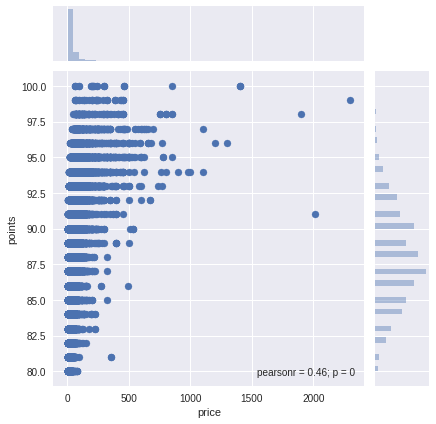

In [14]:
sns.jointplot(x='price',y='points',data=reviews[['price','points']])

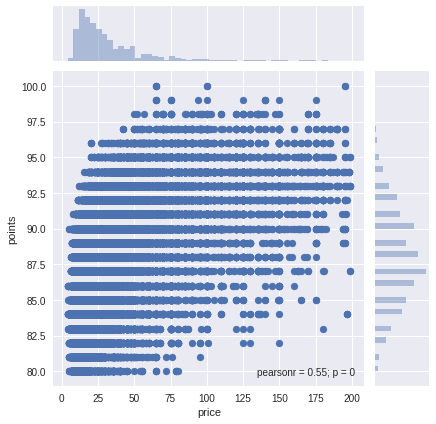

In [15]:
sns.jointplot(x='price',y='points',data=reviews.loc[reviews['price']<200].loc[:,['price','points']])

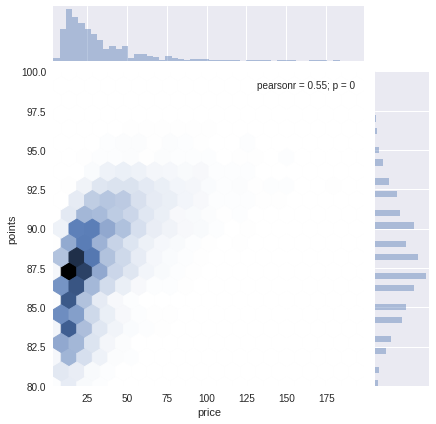

In [18]:
sns.jointplot(x='price',y='points',data=reviews.loc[reviews['price']<200].loc[:,['price','points']],
              kind='hex',gridsize=20)